# MSSM Practical 1:Simulation of Diffusion using Finite differences

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

In [7]:
def Coefficient_Matrix(N):
    n = N * N - 2 * N
    MatrixA = np.eye(n, n)

    for rowNo in range(n):
        for columnNo in range(n):
            if columnNo == rowNo:
                MatrixA[rowNo][columnNo] = -4
            elif columnNo == (rowNo + N) or columnNo == (rowNo - N) or columnNo == (rowNo + 1) or columnNo == (rowNo - 1):
                MatrixA[rowNo][columnNo] = 1
            if rowNo % N == 0 and columnNo == rowNo - 1:
                MatrixA[rowNo][columnNo] = 0
            elif rowNo % N == 0 and columnNo == rowNo + 1:
                MatrixA[rowNo][columnNo] = 2
            elif rowNo % N == N - 1 and columnNo == rowNo + 1:
                MatrixA[rowNo][columnNo] = 0
            elif rowNo % N == N - 1 and columnNo == rowNo - 1:
                MatrixA[rowNo][columnNo] = 2
    return MatrixA

In [8]:
def Known_Vector1(N, J_left, J_right):
    n = N*N - 2*N
    Vectorb1 = np.zeros(n)
    for row in range(n):
        if row % N == 0:
            Vectorb1[row] = J_left
        elif row % N == N-1:
            Vectorb1[row] = J_right
    return Vectorb1

def Known_Vector2(N, rho_upper, rho_lower):
    n = N*N - 2*N
    Vectorb2 = np.zeros(n)
    Vectorb2[0:N] = rho_upper
    Vectorb2[-N:n] = rho_lower
    return Vectorb2

In [9]:
def Unknown_Vector(N, j_left, j_right, rho_upper, rho_lower):
    x = 1
    h = x/N  #step size
    D = 5
    J_left = j_left*2*h/D
    J_right = j_right*2*h/D
    A = Coefficient_Matrix(N)
    b1 = Known_Vector1(N, J_left, J_right)
    b2 = Known_Vector2(N, rho_upper, rho_lower)
    vectorX = np.linalg.solve(A, b1-b2)

    initial_concentration = 50
    gridmatrix = np.ones((N, N)) * initial_concentration
    for row in range(N - 2):
        for column in range(N):
            gridmatrix[row + 1,column] = vectorX[row * N + column]
    return gridmatrix, vectorX
grid,x = Unknown_Vector(N =5, j_left=100, j_right=100, rho_upper=100, rho_lower=50)
print('complete vector X is ',grid)
print("only unknown columns of vector x are ", x)

complete vector X is  [[50.         50.         50.         50.         50.        ]
 [82.65966387 84.91176471 85.51680672 84.91176471 82.65966387]
 [68.81512605 71.47058824 72.24369748 71.47058824 68.81512605]
 [57.65966387 59.91176471 60.51680672 59.91176471 57.65966387]
 [50.         50.         50.         50.         50.        ]]
only unknown columns of vector x are  [82.65966387 84.91176471 85.51680672 84.91176471 82.65966387 68.81512605
 71.47058824 72.24369748 71.47058824 68.81512605 57.65966387 59.91176471
 60.51680672 59.91176471 57.65966387]


## Task 5.2:

In [10]:
def plotting_task(grid, title, rho_upper, rho_lower):
    plt.imshow(grid, origin='lower', extent=[0, 5, 0, 5])
    plt.colorbar(label=f'Concentration = {rho_upper}, {rho_lower}')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

### Task 5.2(1): Concentration should be constant everywhere

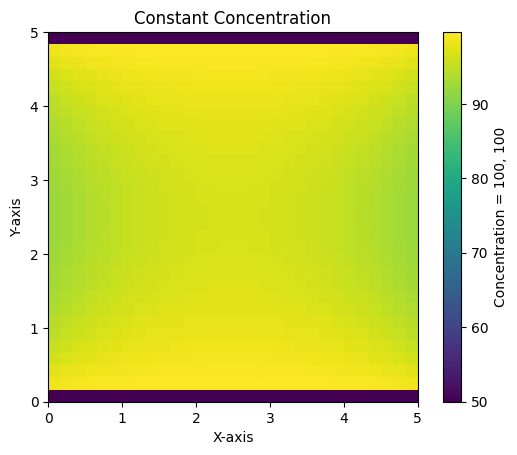

In [11]:
grid1, x1b = Unknown_Vector(N=30, j_left=100, j_right=100, rho_upper=100, rho_lower=100)
plotting_task(grid1, 'Constant Concentration', 100, 100)  # plot says not exactly constant but it is close


### Task 5.2(2): Concentration should be linear

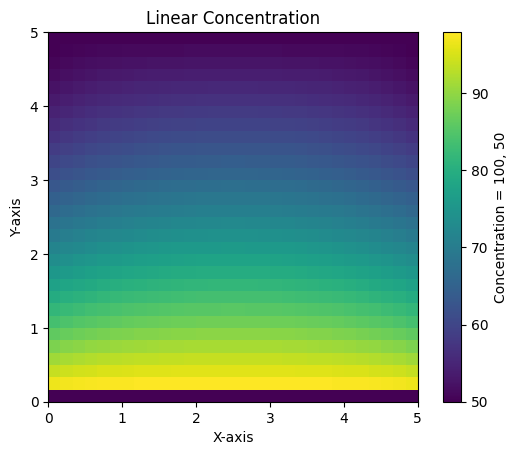

In [12]:
grid2, x2 = Unknown_Vector(N=30, j_left=100, j_right=100, rho_upper=100, rho_lower=50)
plotting_task(grid2, 'Linear Concentration', 100, 50)

### Task 5.2(3): 
Change the Dirichlet BC to different pairs of concentration:{ρupper, ρlower} = {200, 100} mol · m−3, {50, 30} mol · m−3, {..., ...}.How can you set up a single simulation to completely describe the behaviour?


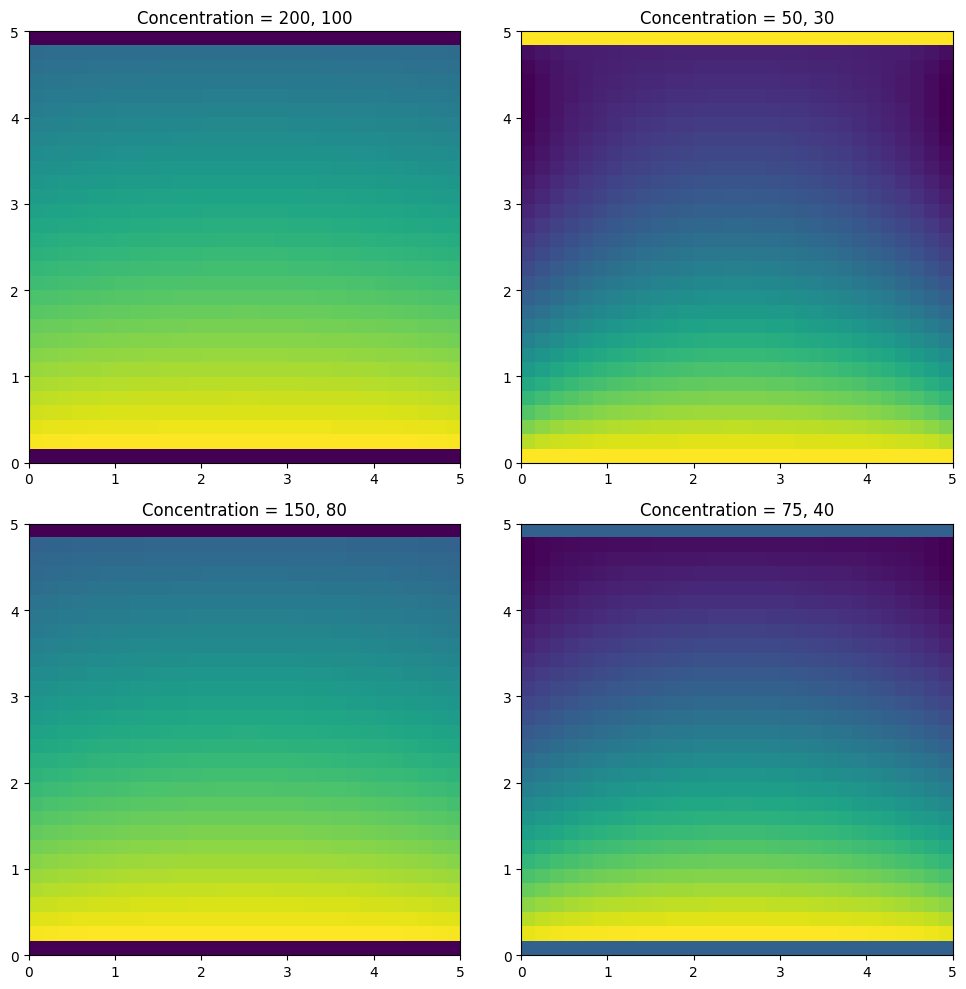

In [13]:
grids = []
titles = []
rho_pairs = [(200, 100), (50, 30), (150, 80), (75, 40)]  # Add more pairs as needed
for rho_upp, rho_low in rho_pairs:
    grid, a = Unknown_Vector(N=30, j_left=100, j_right=100, rho_upper=rho_upp, rho_lower=rho_low)
    grids.append(grid)
    titles.append(f'Concentration = {rho_upp}, {rho_low}')
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, (grid, title) in enumerate(zip(grids, titles)):
    ax = axes[i // 2, i % 2]
    ax.imshow(grid, origin='lower', extent=[0, 5, 0, 5])
    ax.set_title(title)
plt.tight_layout()
plt.show()

### Task 5.2(4):  
Compare the numerical solution of a coarse grid (e.g. 5x5) with the analytical solution


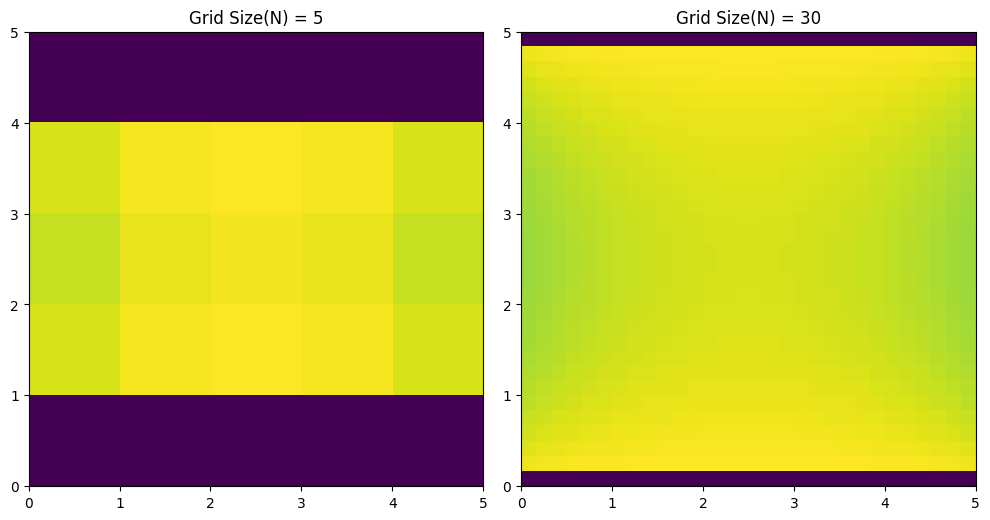

In [14]:
grids = []
titles = []
N = [5, 30]

for i in N:
    grid, a = Unknown_Vector(i, j_left=100, j_right=100, rho_upper=100, rho_lower=100)
    grids.append(grid)
    titles.append(f'Grid Size(N) = {i}')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Use 1 row and 2 columns for two subplots

for i, (grid, title) in enumerate(zip(grids, titles)):
    ax = axes[i % 2]  # Use modulo to handle the correct subplot index
    ax.imshow(grid, origin='lower', extent=[0, 5, 0, 5])
    ax.set_title(title)
plt.tight_layout()
plt.show()

### Task 5.2(5):
What happens when you increase the number of nodes? Demonstrate the behaviour through a convergence (error) plot

C:\Users\suman\AppData\Local\Temp\ipykernel_25816\3364637447.py:13: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolation = interp2d(x, y, analytical_solution)
C:\Users\suman\AppData\Local\Temp\ipykernel_25816\3364637447.py:14: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
     

error for (N) = 5 is  4.904296187944848
error for (N) = 10 is  4.050834103478189
error for (N) = 20 is  3.3225898549121786
error for (N) = 40 is  2.3957571332448215
error for (N) = 60 is  1.5764563331212753
error for (N) = 80 is  0.7824712448275297
error for (N) = 100 is  0.0
[4.904296187944848, 4.050834103478189, 3.3225898549121786, 2.3957571332448215, 1.5764563331212753, 0.7824712448275297, 0.0]


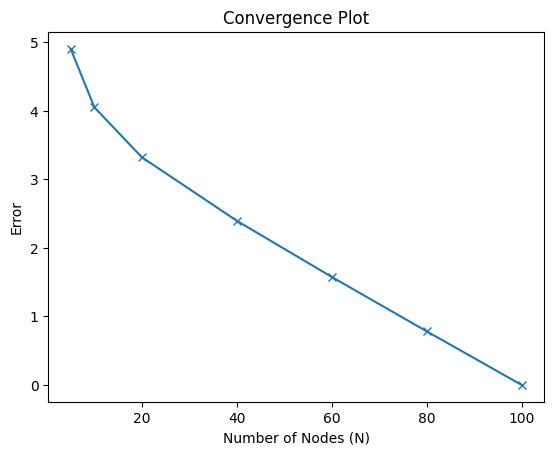

In [15]:
from scipy.interpolate import interp2d

def compute_error(N):
    grid, a = Unknown_Vector(N, j_left=100, j_right=100, rho_upper=100, rho_lower=100)
    analytical_solution, b = Unknown_Vector(100, j_left=100, j_right=100, rho_upper=100, rho_lower=100)
    # Interpolate analytical solution to match the grid size
    #analytical_solution_resized = scipy.interpolate.interp2d(np.linspace(0, 1, 100), np.linspace(0, 1, 100), analytical_solution)(np.linspace(0, 1, N), np.linspace(0, 1, N))
    
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    newx = np.linspace(0, 1, N)
    newy = np.linspace(0, 1, N)
    interpolation = interp2d(x, y, analytical_solution)
    new_analytical_solution = interpolation(newx, newy)
    error = np.linalg.norm(grid - new_analytical_solution)
    print(f'error for (N) = {N} is ', error )
    return error

N_values = [5, 10, 20, 40, 60, 80, 100]
errors = [compute_error(N) for N in N_values]
#errors = [4.904296187944848, 4.050834103478189, 3.3225898549121786, 2.3957571332448215, 0.7824712448275297, 0.0]
print(errors)
plt.plot(N_values, errors, marker='x')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Error')
plt.title('Convergence Plot')
plt.show()

### Task 5.2(6): 
How can you speed up your simulation for the case that jlef t =
jright = 0 and arbitrary ρupper and ρlower without affecting the
result?


#### Solution:
When both jleft and jright are zero, the coefficients in the matrix A become constant and do not depend on the specific grid size(N). Therefore, we can precompute the constant part of the matrix outside the loop, avoiding redundant calculations.

### Task 5.2(7):
Plot your results with different boundary conditions and an appropriate number of nodes. Interpret and explain the results. In
particular explain the behaviour towards the boundaries.


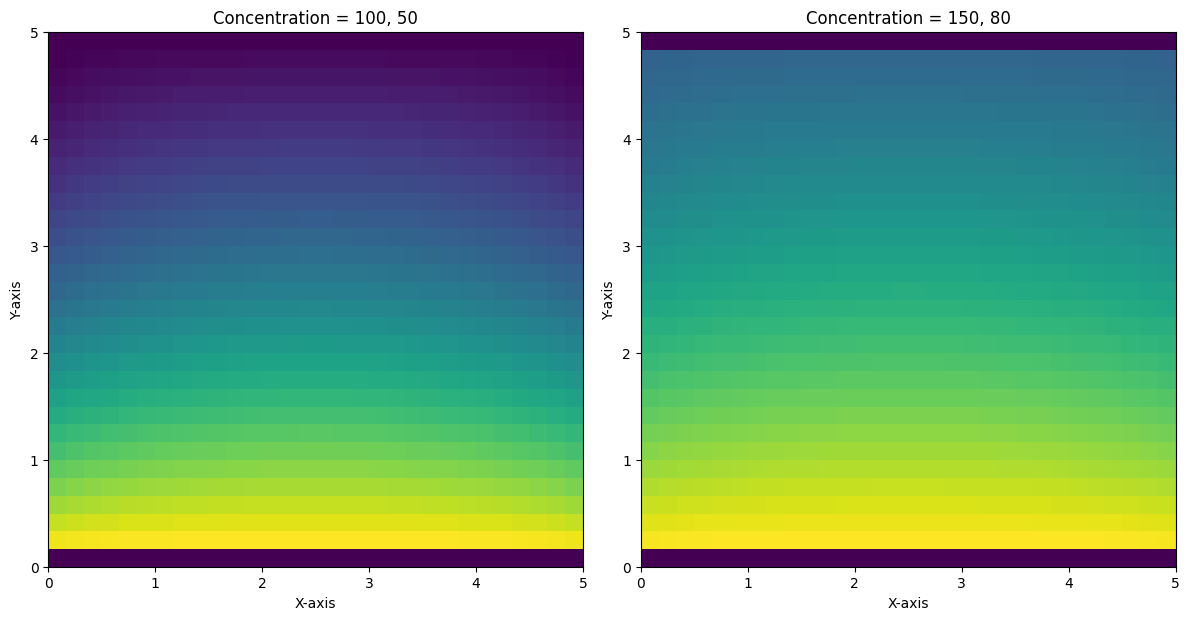

In [16]:
rho_pairs = [(100, 50), (150, 80)]
grids = []
titles = []

for rho_upp, rho_low in rho_pairs:
    grid, _ = Unknown_Vector(30, j_left=100, j_right=100, rho_upper=rho_upp, rho_lower=rho_low)
    grids.append(grid)
    titles.append(f'Concentration = {rho_upp}, {rho_low}')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (grid, title) in enumerate(zip(grids, titles)):
    ax = axes[i]
    ax.imshow(grid, origin='lower', extent=[0, 5, 0, 5])
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    #ax.colorbar()

plt.tight_layout()
plt.show()